In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os

from Functions.visualization_functions import *

In [33]:
# Runs to compare
df_ppo = pd.read_csv('Data/2024-12-17_environment_data_PPO.csv')
df_a2c = pd.read_csv('Data/2024-12-03_environment_data_A2C.csv')
df_ddpg = pd.read_csv('Data/2024-12-04_environment_data_DDPG.csv')
df_heuristic = pd.read_csv('Data/2024-12-17_environment_data_heuristic.csv')
df_greedy = pd.read_csv('Data/2024-12-04_environment_data_greedy.csv')
df_fixed = pd.read_csv('Data/2024-12-17_environment_data_fixed_order.csv')

# Dataframes to compare
df_rl = [df_ppo, df_ddpg, df_a2c]

df_all = [df_ppo, df_ddpg, df_a2c, df_greedy, df_fixed, df_heuristic]
df_list = [df_ppo, df_ddpg, df_a2c, df_fixed, df_heuristic]

# Labels for the plots
label_rl = ['PPO', 'DDPG']
labels_all = ['PPO', 'DDPG', 'A2C','Greedy', 'Fixed', "Calculated"]
labels = ['PPO', 'DDPG', 'A2C','Fixed', 'Calculated'] # without greedy for improved visualization

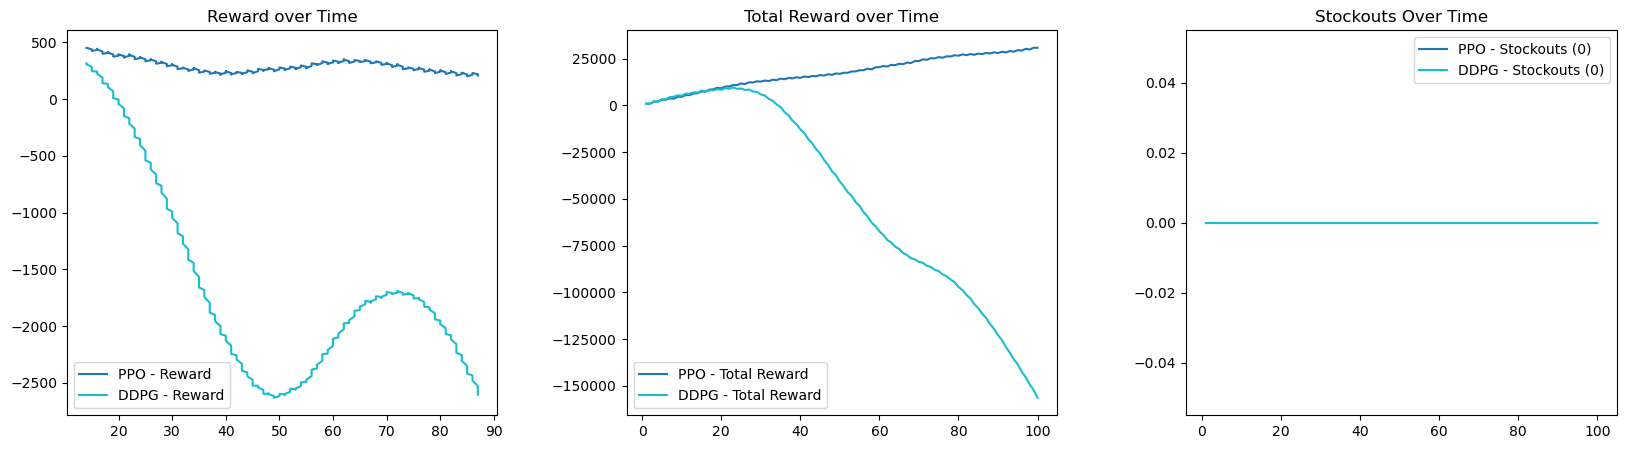

In [34]:
benchmark_plot(df_rl, label_rl)

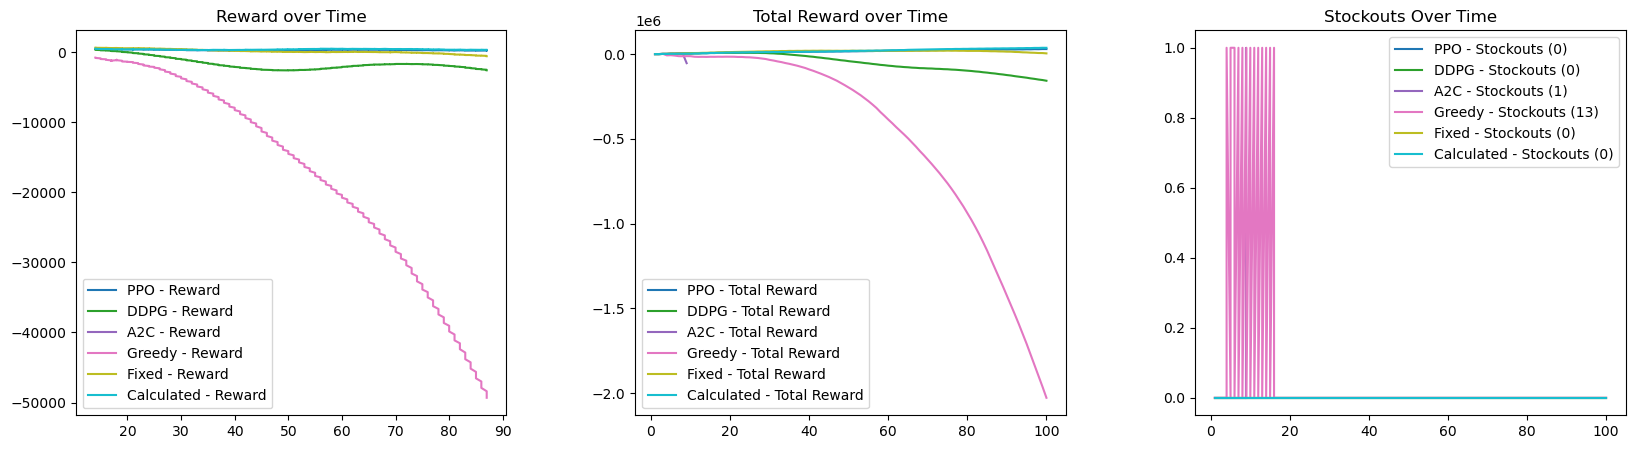

In [35]:
benchmark_plot(df_all, labels_all)

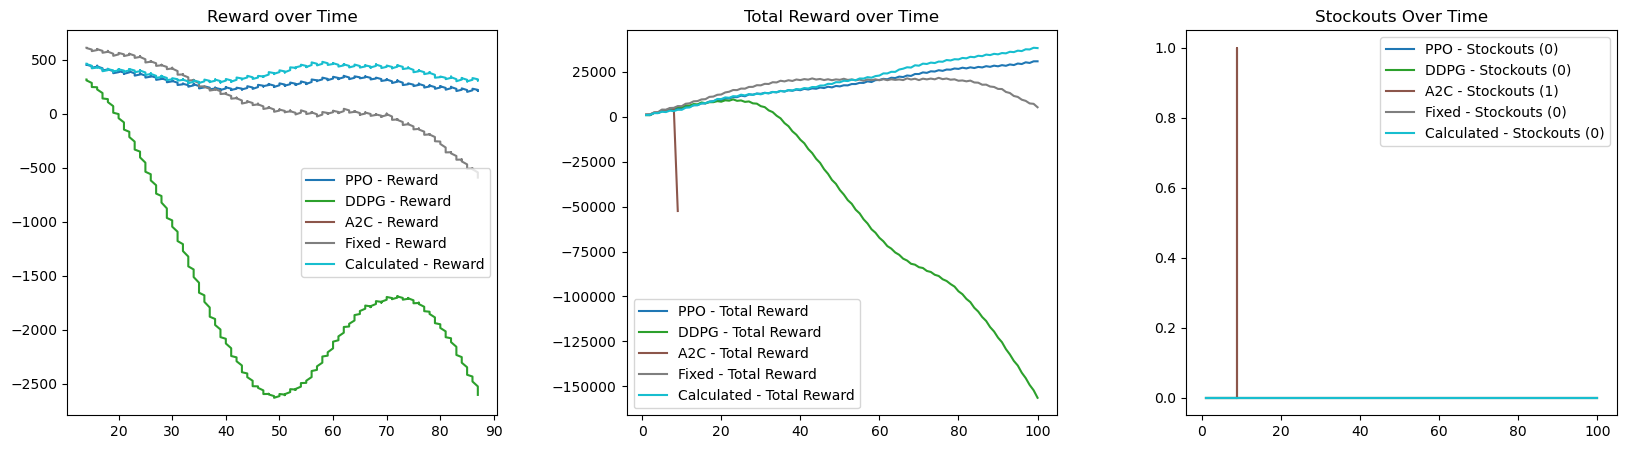

In [36]:
benchmark_plot(df_list, labels)

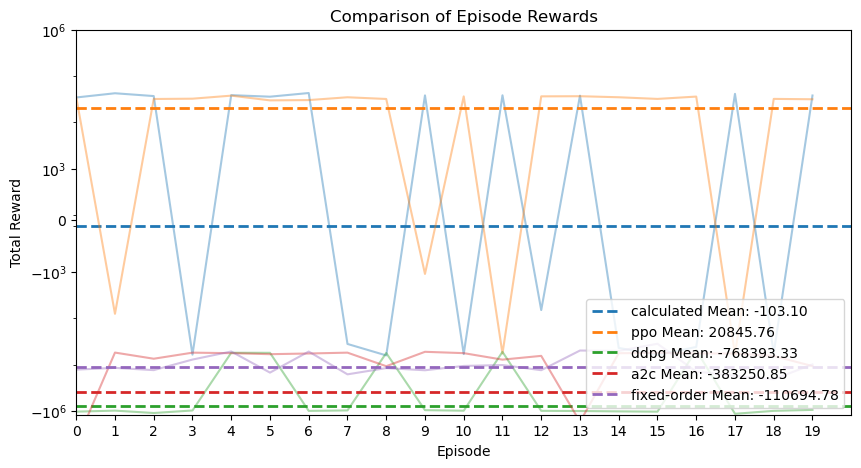

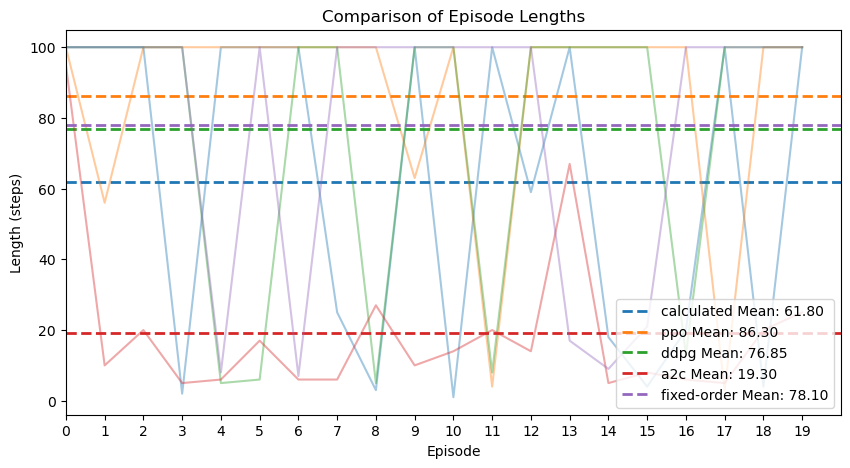

In [48]:
# Function to load data from a JSON file
def load_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# List of file paths to compare
file_paths = [
    "./Data/Evaluation/evaluation_results_calculated.json", 
    "./Data/Evaluation/evaluation_results_ppo.json",
    "./Data/Evaluation/evaluation_results_ddpg.json",
    "./Data/Evaluation/evaluation_results_a2c.json",
    "./Data/Evaluation/evaluation_results_fixed-order.json"
]

# Dictionary to store data from each file
comparison_data = {}

for file_path in file_paths:
    label = os.path.splitext(os.path.basename(file_path))[0].split("_")[-1]
    data = load_data(file_path)

    if isinstance(data, dict):  # File with "episode_rewards" and "episode_lengths"
        rewards = data["episode_rewards"]
        lengths = data["episode_lengths"]
    elif isinstance(data, list):  # Standardized file format
        rewards = [entry["score"] for entry in data]
        lengths = [entry["timesteps"] for entry in data]
    else:
        raise ValueError(f"Unknown data format in file: {file_path}")

    comparison_data[label] = {"rewards": rewards, "lengths": lengths}

# Plot Rewards Comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    rewards = data["rewards"]
    mean_reward = sum(rewards) / len(rewards)

    # Plot rewards line without label (invisible in legend)
    line, = plt.plot(rewards, alpha=0.4, label='')  # No label for episode lines
    mean_color = line.get_color()

    # Add mean line with label
    plt.axhline(y=mean_reward, color=mean_color, linestyle='--', linewidth=2, label=f"{label} Mean: {mean_reward:.2f}")

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.ylim(-1.2e6, 1e6)
plt.yscale("symlog", linthresh=1e3)
plt.yticks(ticks=[-1e6, -1e3, 0, 1e3, 1e6])
plt.title("Comparison of Episode Rewards")
plt.xlim(0, 20)
plt.xticks(range(0, 20, 1))
plt.legend(loc="lower right")
plt.show()

# Plot Episode Lengths Comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    lengths = data["lengths"]
    mean_length = sum(lengths) / len(lengths)

    # Plot lengths line without label (invisible in legend)
    line, = plt.plot(lengths, alpha=0.4, label='')  # No label for episode lines
    mean_color = line.get_color()

    # Add mean line with label
    plt.axhline(y=mean_length, color=mean_color, linestyle='--', linewidth=2, label=f"{label} Mean: {mean_length:.2f}")

plt.xlabel("Episode")
plt.ylabel("Length (steps)")
plt.title("Comparison of Episode Lengths")
plt.xlim(0, 20)
plt.xticks(range(0, 20, 1))
plt.legend(loc="lower right")
plt.show()